In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.udp.csv')
m_a=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.ack.csv')
m_sc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.syn.csv')
# m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udp.csv')
# m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udpplain.csv')

In [8]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
g_t['type']='tcp'
g_u['type']='udp'
m_a['type']='ack'
m_sc['type']='mirai.scan'
# m_sy['type']='attack'
# m_u_p['type']='attack'

In [9]:
data=pd.concat([benign,g_c,g_j,g_s,g_t,g_u,m_a,m_sc],
               axis=0, sort=False, ignore_index=True)

In [10]:
data.head()
data.groupby('type')['type'].count()

type
ack           113285
benign         13113
combo          53012
junk           30312
mirai.scan     43192
scan           27494
tcp            95021
udp           104791
Name: type, dtype: int64

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [13]:
from collections import Counter
print(sorted(Counter(y).items()))

[('ack', 13113), ('benign', 13113), ('combo', 13113), ('junk', 13113), ('mirai.scan', 13113), ('scan', 13113), ('tcp', 13113), ('udp', 13113)]


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [15]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

In [19]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

In [20]:
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=115))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(8, activation='sigmoid', kernel_initializer='random_normal'))

In [21]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7424      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 10,168
Trainable params: 10,168
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2623/2623 [==============================] - 7s 2ms/step - loss: 0.3881 - accuracy: 0.7830 - val_loss: 0.3021 - val_accuracy: 0.8139
Epoch 2/10
2623/2623 [==============================] - 5s 2ms/step - loss: 0.2879 - accuracy: 0.8185 - val_loss: 0.3152 - val_accuracy: 0.8095
Epoch 3/10
2623/2623 [==============================] - 6s 2ms/step - loss: 0.2781 - accuracy: 0.8214 - val_loss: 0.2764 - val_accuracy: 0.8236
Epoch 4/10
2623/2623 [==============================] - 5s 2ms/step - loss: 0.2619 - accuracy: 0.8303 - val_loss: 0.2681 - val_accuracy: 0.8223
Epoch 5/10
2623/2623 [==============================] - 6s 2ms/step - loss: 0.2487 - accuracy: 0.8375 - val_loss: 0.2327 - val_accuracy: 0.8596
Epoch 6/10
2623/2623 [==============================] - 6s 2ms/step - loss: 0.2088 - accuracy: 0.8647 - val_loss: 0.1999 - val_accuracy: 0.8681
Epoch 7/10
2623/2623 [==============================] - 6s 2ms/step - loss: 0.1940 - accuracy: 0.8688 - val_loss: 0.1952 - val_accuracy:

In [23]:
y_pred=classifier.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**





In [24]:
print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8645917735093657
MCC        : 0.8608345023661954


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2561
           1       1.00      0.97      0.98      2637
           2       1.00      0.96      0.98      2691
           3       0.96      1.00      0.98      2592
           4       1.00      1.00      1.00      2583
           5       1.00      1.00      1.00      2599
           6       0.25      0.00      0.00      2633
           7       0.50      1.00      0.67      2685

    accuracy                           0.86     20981
   macro avg       0.83      0.87      0.82     20981
weighted avg       0.83      0.86      0.82     20981



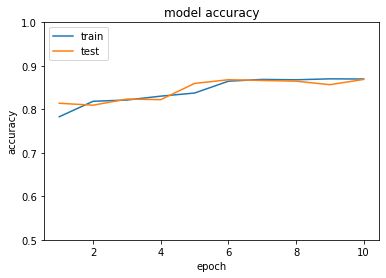

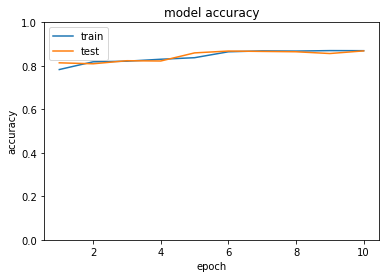

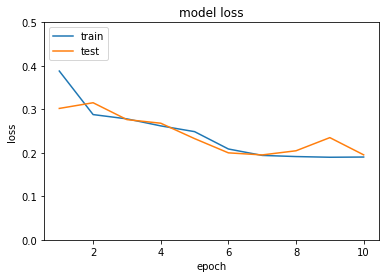

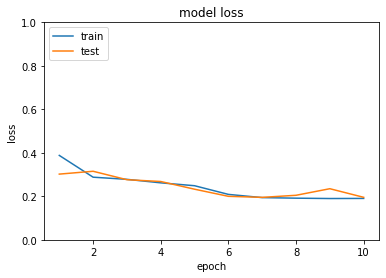

In [26]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

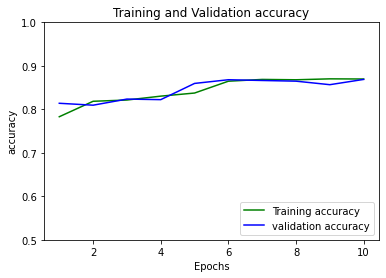

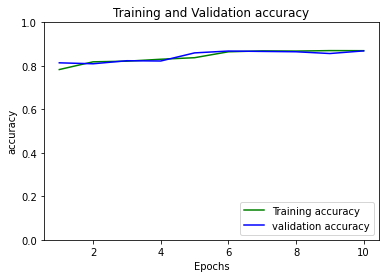

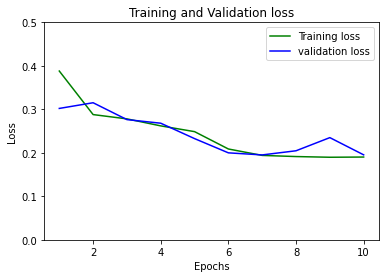

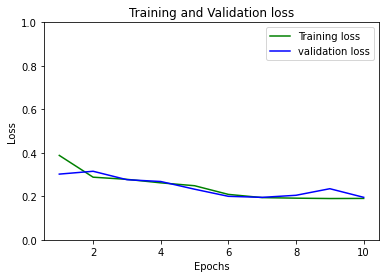

In [27]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[2560    1    0    0    0    0    0    0]
 [  88 2548    0    0    0    0    0    1]
 [   0    1 2583  107    0    0    0    0]
 [   0    0    1 2590    0    1    0    0]
 [   0    0    0    0 2579    1    2    1]
 [   0    0    0    0    0 2598    0    1]
 [   0    1    0    0    0    1    1 2630]
 [   0    1    0    1    0    1    1 2681]]


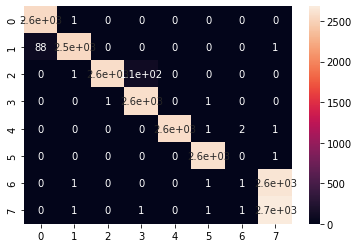

In [28]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)